# Predicting Housing Prices in King County 
#### Team Members: Avery Lee, Pranav Natarajan, Malikah Nathani, Zach Zlepper
#### Date: 6/2/2022
###### Models: Linear Regression, Elastic Net, SVM Regression, AdaBoost Regression, Random Forest Regression 

## Import libraries 

In [1]:
import os
import tarfile
from six.moves import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Preprocessing

The dataset contains information about housing prices in the King County area. Our goal is to use this dataset to create models that predict the housing price given a property's features, and compare to see which models have better performance. The dataset is from Kaggle: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download

We drop the date and id values because they are just identifiers or are too niche of a predictor. The zipcode and waterfront values are categorical so they are OneHotEncoded. Numeric features are normalized using StandardScaler. We split the train and test set by the default values, 75%/25%. 

In [2]:
data = pd.read_csv('/content/sample_data/kc_house_data.csv')
data = data.drop(["date"], axis=1)       # do not need the date of purchase. Too niche a predictor
data = data.drop(["id"], axis=1)         # do not need the id. perfect predictor, makes no sense for out of sample cases

## NEED TO CHANGE zipcode and waterfront to categorical variable by definition 
data.zipcode = data.zipcode.astype('category')
data.waterfront = data.waterfront.astype('category')

## Performing Train-Test Split
## default split is 0.75-0.25
X_train, X_test, y_train, y_test = train_test_split(data.drop(['price'], axis=1), 
                                                    data.price,
                                                    random_state=42)
# PIPELINE 
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])
num_features = data.drop(["waterfront","zipcode", "price"], axis=1)
num_attribs = list(num_features)
cat_attribs = ["waterfront","zipcode"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)])

X_train_scaled = full_pipeline.fit_transform(X_train)
X_test_scaled = full_pipeline.fit_transform(X_test)
X_train_scaled.columns = X_train.columns.copy()
X_test_scaled.columns = X_test.columns.copy()

Below is the dataset before preprocessing. 

In [3]:
pd.DataFrame(X_train)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5945,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
8423,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
13488,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
20731,2,2.25,1240,705,2.0,0,0,3,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
2358,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,1.50,1000,6914,1.0,0,0,3,7,1000,0,1947,0,98125,47.7144,-122.319,1000,6947
21575,3,2.50,3087,5002,2.0,0,0,3,8,3087,0,2014,0,98023,47.2974,-122.349,2927,5183
5390,3,2.50,2120,4780,2.0,0,0,3,7,2120,0,2004,0,98053,47.6810,-122.032,1690,2650
860,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000


In [4]:
X_train.shape

(16209, 18)

After preprocessing, specifically, OneHotEncoding, the dataset becomes sparse so it does not visualize nicely. However, we can still see that the shape is maintained. 

In [5]:
X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((16209, 88), (16209,), (5404, 88), (5404,))

In [6]:
pd.DataFrame(X_train_scaled)

,0
0,"(0, 0)\t0.6774021493321546\n (0, 1)\t0.1789..."
1,"(0, 0)\t-0.3941320985964968\n (0, 1)\t0.505..."
2,"(0, 0)\t0.6774021493321546\n (0, 1)\t0.5056..."
3,"(0, 0)\t-1.465666346525148\n (0, 1)\t0.1789..."
4,"(0, 0)\t-0.3941320985964968\n (0, 1)\t-0.14..."
...,...
16204,"(0, 0)\t-0.3941320985964968\n (0, 1)\t-0.80..."
16205,"(0, 0)\t-0.3941320985964968\n (0, 1)\t0.505..."
16206,"(0, 0)\t-0.3941320985964968\n (0, 1)\t0.505..."
16207,"(0, 0)\t-2.5372005944537994\n (0, 1)\t-1.78..."


In [7]:
y_train

5945     268643.0
8423     245000.0
13488    200000.0
20731    352499.0
2358     232000.0
           ...   
11964    378000.0
21575    399950.0
5390     575000.0
860      245000.0
15795    315000.0
Name: price, Length: 16209, dtype: float64

## Linear Regression + Elastic Net 

We will focus on the Linear Least Squares Regressor, without any cross validation performed nor with any feature selection as the baseline model.

The Linear Regressor finds the 'hyperplane' of best fit for all observed feature points in the feature set. It uses the theory of the normal equations to derive feature coefficients $\beta_j, 1\le j \le N$, where $N$ is the number of features.

It also assumes that the residuals (i.e, errors) $\epsilon_j$ are distributed normally-an important assumption.

In [8]:
from sklearn.linear_model import LinearRegression
# instantiating linear regression model
lin_reg = LinearRegression()

# fitting the model on the training set,
# and getting in sample predictions
lin_reg.fit(X_train_scaled, y_train)
lin_train_pred = lin_reg.predict(X_train_scaled)
# calculating in-sample RMSE
lin_train_rmse = np.sqrt(mean_squared_error(y_train, lin_train_pred))

# getting predictions of the model on the test set,
# and getting out-of-sample predictions
lin_test_pred = lin_reg.predict(X_test_scaled)
# calculating the out of sample RMSE
lin_test_rmse = np.sqrt(mean_squared_error(y_test, lin_test_pred))

# printing to console
print(f'Train RMSE: {lin_train_rmse}, Test RMSE: {lin_test_rmse}')

Train RMSE: 157885.61375305994, Test RMSE: 170289.19933769965


Now that we have the baseline RMSE values to compare in sample and out of sampel performance with, we will try the [Elastic Net Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html).
It is a linear regressor, but contains hyperparameters that control the bias/variance tradeoff, and the penalisation of the feature weights. 

We will use a [grid Search with 5 fold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to help us tune the hyperparameters associated with tradeoff and penalisation, thereby solving the conundrum of overfitting as well.

The L1 penalty, which is based on the L1 vector norm - the sum of absolute values of a vector, is of importance to us in this case. It automatically sets weak features' weights to zero-performing automatic feature selection. 

Noting that L1 regression (i.e., lasso regression) performs best when the number of observations far outnumber the number of features in the dataset, we make the hypothesis that the L1 norm will be the optimal penalisation hyperparameter.

In [9]:
# importing the ElasticNet Model
from sklearn.linear_model import ElasticNet

In [10]:
# creating the grid for tuning -- the mixing percentage alpha, and the penalty parameter r

In [11]:
# creating the parameter grid
param_grid={
            # the bias-variance tradeoff parameter, to be in [0, 1]
            'alpha': list(np.arange(11) / 10.0), 
            # the penalisation parameter, to be in (0.01, 1]
            'l1_ratio': list(np.arange(2, 11) / 10.0)
            }

In [12]:
# creating the GridSearchCV object, 
# with 5 fold Cross validation on the Scaled Training Set
best_elastic_net = GridSearchCV(estimator=ElasticNet(random_state=42),
                                param_grid=param_grid,
                                scoring='neg_root_mean_squared_error',
                                n_jobs = -1)

In [13]:
# fitting on the scaled training set
best_elastic_net.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40550574079409.06, tolerance: 210410096861.09872
  positive,


GridSearchCV(estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0],
                         'l1_ratio': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                      1.0]},
             scoring='neg_root_mean_squared_error')

In [14]:
best_elastic_net.best_params_

{'alpha': 0.9, 'l1_ratio': 1.0}

We see that our hypothess holds true! the L1 penalty is the optimal penalisation parameter!

In [15]:
# storing the best model
best_model = best_elastic_net.best_estimator_

In [16]:
# getting training and testing performance
train_en_preds = best_model.predict(X_train_scaled)
train_en_rmse = np.sqrt(mean_squared_error(y_true=y_train, y_pred=train_en_preds))

test_en_preds = best_model.predict(X_test_scaled)
test_en_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=test_en_preds))


In [17]:
# printing the train and test RMSE values
print("Train RMSE = ", train_en_rmse)
print("Test RMSE = ", test_en_rmse)

Train RMSE =  157885.73832942848
Test RMSE =  170480.25155699125


Note that the in sample performance is similar, but the out of sample performance is slightly worse than simple linear regression. We will fix the L1 penalty and focus in tuning $\alpha$ a bit more in a hope to remedy this.

In [18]:
# creating the grid for tuning -- 
# the mixing percentage alpha, and the penalty parameter l1_ratio
# 
param_grid={
            #  setting an alpha neighbourhood 
            #  around the previous optimal value 
            #  to potentially arrive at the 'true optimum' 
            # percentage of bias/variance tradeoff
            'alpha': list(np.arange(85, 101) / 100.0), 
            'l1_ratio': [1.0] # fixed L1 penalty.
            }

# creating the GridSearchCV object, 
# with 5 fold Cross validation on the Scaled Training Set
best_elastic_net = GridSearchCV(estimator=ElasticNet(random_state=42),
                                param_grid=param_grid,
                                scoring='neg_root_mean_squared_error',
                                n_jobs = -1, cv=5)

# fitting on the scaled training set
best_elastic_net.fit(X_train_scaled, y_train)

# getting the optimal hyperparameters
print(best_elastic_net.best_params_)

# getting the minimised RMSE
print(np.abs(best_elastic_net.best_score_))

# storing the best model
best_model = best_elastic_net.best_estimator_

# getting training and testing performance
train_en_preds = best_model.predict(X_train_scaled)
train_en_rmse = np.sqrt(mean_squared_error(y_true=y_train, y_pred=train_en_preds))

test_en_preds = best_model.predict(X_test_scaled)
test_en_rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=test_en_preds))

# printing the train and test RMSE values
print("Train RMSE = ", train_en_rmse)
print("Test RMSE = ", test_en_rmse)

{'alpha': 0.85, 'l1_ratio': 1.0}
159140.56203369814
Train RMSE =  157885.7248837366
Test RMSE =  170480.39298843697


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40547646310374.5, tolerance: 210410096861.09872
  positive,


We again see that the Elastic net with the above hyperparameters performs poorly in comparision to the simple linear regressor, highlighting a need for further hyperparameter tuning or other methods to remove collinearity in the model.

The true value of $\alpha$ could lie in the interval from (0.8, 0.9), and could be the case of future tuning. measuring VIF or linear correlation between the features could be helpful cut down on some features before model fitting and hopefully result in better performance.

PCA before running the regression could help the reduction of collinear features, but does run the risk of removing clearly highly correlated features with the label, leading to a worse performing model.

## SVM Regression 

In this section, I used Support Vector Machine Regression to predict the price of a home based off of our predictors. The support vector machine algorithm finds the Maximum-margin hyperplane and margins based off of different parameters such as our C value. As you will see below, I used Cross validation to find our optimal C value. Due to runtime constraints, I select a wide band of C values and used 3-5 test C values per CV run. I continually narrowed that range manuelly and stopped at our current state due to diminishing returns of further narrowing. For computational efficiency and added flexibility of the model, I used the kernel trick with a polynomial kernel. Instead of using polynomial predictor values, the polynomial kernel yields similar results with drastically better runtimes. Also, we can find non-linear regression boundries for our prediction.


In [19]:
from sklearn.svm import SVR # Hyperparameter CV for SVM 
C_param = np.linspace(start=65000, stop=75000, num=3)
param = {'kernel' : ['poly'],'C' : C_param}

modelsvr = SVR()

grids = GridSearchCV(modelsvr,param,cv=5)

grids.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([65000., 70000., 75000.]),
                         'kernel': ['poly']})

In [20]:
best_model_svr = grids.best_estimator_

In [21]:
best_model_svr #Best Model 

SVR(C=75000.0, kernel='poly')

In [22]:
# getting training and testing performance
pred_train_svr = best_model_svr.predict(X_train_scaled)
train_rmse_svr = np.sqrt(mean_squared_error(y_true=y_train, y_pred=pred_train_svr))

pred_test_svr = best_model_svr.predict(X_test_scaled)
test_rmse_svr = np.sqrt(mean_squared_error(y_true=y_test, y_pred=pred_test_svr))

In [23]:
train_rmse_svr

117901.4970217094

In [24]:
test_rmse_svr

142851.9597807096

Ultimately, the final model I ran used a C value of 75000 and had a training RMSE of 117901 and a test RMSE of 142851. Since the training RMSE and the test RMSE are not drastically different from one another we can see that our algorithm didnt overfit the training data with our chosen C value. 

## AdaBoost Regression 

In this section we will try AdaBoost Regression to predict housing prices. In essence, AdaBoost is an ensemble algorithm that uses decision trees to train the model in succession, updating weights for each feature based on its performance in the previous iteration. So more weights will go towards features that were harder to determine. This calls for multiple hyperparameters, but we will look at three for this problem.

Hyperparameter tuning was done for n_estimators and learning_rate for AdaBoostRegressor, and max_depth for DecisionTreeRegressor. To save time but still get the point across in the cell below, a wider range of hyperparameters were cross validated behind the scenes, then were narrowed to get these set of values to test over. Otherwise, it would take over 30 minutes to run the grid search. The first parameters I tested were the ones below, and were narrowed down based on their performance. 
```
n_estimators_list = np.arange(5, 100, 5)
learning_rate_list = [0.01, 0.1, 1.0, 5, 10]
max_depth_list = np.arange(1, 10, 2)
```
The more max_depth there was in the decision tree, the lower the training error became. However, the testing error increased significantly, and Adaboost utilitzes small decision trees anyway, so I had to cut the depth to 5 as shown below. Even lower depths caused both the training and testing errors to increase significantly, which may indicate underfitting. 

The exact results may change slightly every iteration due to randomness. The errors here may be different from the ones on the slides. But the general pattern should be consistent. The errors on the slides are 138883 and 176715 for training and testing respectively. 

In [25]:
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.tree import DecisionTreeRegressor
import warnings 
warnings.filterwarnings('ignore') # suppress unncessary warnings 

# hyperparameters: n_estimators, learning_rate
n_estimators_list = [70, 75, 80]
learning_rate_list = [0.09, 0.10, 0.11]
max_depth_list = [4, 5]
params = {'n_estimators': n_estimators_list, 'learning_rate': learning_rate_list}

# Grid Search Cross Validation for different max_depth in DecisionTreeRegressor
grids_per_tree = []
for md in max_depth_list:
    ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=md))
    grids_ada = GridSearchCV(ada, params, cv=5, n_jobs=-1)
    grids_ada.fit(X_train_scaled, y_train)
    grids_per_tree.append(grids_ada)

# find best model out of all tree types 
best_model_ada = grids_per_tree[0].best_estimator_
best_score = 0
for grid in grids_per_tree:
    if grid.best_score_ > best_score:
        best_score = grid.best_score_
        best_model_ada = grid.best_estimator_

In [26]:
best_model_ada

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.1, n_estimators=75)

In [27]:
# train and test RMSE 
pred_train_ada = best_model_ada.predict(X_train_scaled.toarray())
train_rmse_ada = np.sqrt(mean_squared_error(y_train, pred_train_ada))

pred_test_ada = best_model_ada.predict(X_test_scaled.toarray())
test_rmse_ada = np.sqrt(mean_squared_error(y_test, pred_test_ada))
print(f'ADABOOST REGRESSOR: Train RMSE: {train_rmse_ada}, Test RMSE: {test_rmse_ada}')

ADABOOST REGRESSOR: Train RMSE: 141129.49511566135, Test RMSE: 179574.28451463973


Compared to the above two models, AdaBoost's performance is moderate. The training and testing errors are a little bit higher for AdaBoost which may indicate it is not the best model for housing prediction, although it is not the worst either. There is some difference between training and testing which may indicate slight overfitting so that is something to be cautious about. Changing the hyperparameters often caused extreme overfitting. However, it does not overfit as much as the Random Forest Regression below. If we had to choose one model from the four, this may not be the best one. It may be due to the sparseness of the data, since AdaBoost might not work well with very noisy data or data with many outliers. 

## Random Forest Regression

In this section we will look to see if the Random Forest Regression can successfuly predict housing prices in King County. Random Forest Regression is a Machine Learning technique that combines multiple ML algorithms to make more accurate predicitions. Essentially, this method constructs multiple decision trees during training and uses the average of these trees to predict results. Random Forest also takes into account feature selection, which determines the more important features of the model. We also wanted to see which features were the most important in the model, thus did so by using the feature_importances_ method.

To determine the best model, we also decided to tune some of the hyperparameters. Specifically, n_estimators and ccp_alpha. n_estimators has a default of 100 and just determines the number of trees in the model. Therefore increasing the trees may increase the accuracy of the overall model. ccp_alpha is the way to regularize the minimal cost-complexity pruning. This parameter tries to ensure that overfitting does not occur.

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

n_estimators_list = [50,100,200,500,750]
alpha = [10**(-k) for k in range(0,10)]

rf_rmse_train = []

#decreasing size of X_train_scaled and y_train as process taking too much time
X_mini = X_train_scaled[:1000,:]
y_mini = y_train[:1000]

for a in alpha:
  for n_estimators in n_estimators_list:
    model_rf = RandomForestRegressor(ccp_alpha= a, n_estimators=n_estimators,
                                     n_jobs=-1)
    model_rf.fit(X_mini, y_mini.ravel())
    y_train_pred = model_rf.predict(X_mini)
    rf_rmse_train.append(np.sqrt(mean_squared_error(y_mini, y_train_pred)))

In [29]:
importances = model_rf.feature_importances_
importances

array([4.12451804e-03, 2.13686316e-02, 3.08124574e-01, 1.60890517e-02,
       2.49031871e-03, 2.50287368e-02, 3.62829361e-03, 9.18703193e-02,
       2.21860865e-02, 2.80535440e-02, 3.19264107e-02, 3.45505847e-03,
       1.98753231e-01, 5.78158646e-02, 8.56388017e-02, 1.92599882e-02,
       1.16342557e-02, 1.24438804e-02, 1.98565098e-05, 4.56698201e-06,
       1.22624716e-04, 2.21893286e-02, 6.34201341e-05, 7.51817073e-04,
       3.05507867e-05, 5.06695518e-05, 1.74772944e-06, 9.39915344e-05,
       1.38230710e-04, 3.76683080e-05, 4.83808708e-06, 1.94699202e-04,
       6.37656430e-05, 1.05681325e-03, 9.78672946e-05, 8.18571132e-05,
       1.99060839e-05, 1.73259826e-05, 8.41040278e-05, 1.08707050e-03,
       9.53336629e-05, 5.22054002e-05, 9.90025633e-03, 1.55244735e-03,
       8.50310674e-05, 4.44236686e-05, 2.39940841e-04, 1.19129735e-04,
       2.31098010e-05, 9.64595997e-05, 7.30664461e-05, 1.18696072e-04,
       9.91523441e-05, 1.75312773e-04, 2.91950061e-04, 6.22341522e-05,
      

As we can see the most important feature had the importance of 3.08E-1, this corresponds to the sqft living feature in our dataset. 

In [30]:
o_alpha, o_n_estimator = alpha[0], n_estimators_list[0]
min_rmse_train = rf_rmse_train[0]
ind = 0

for a in alpha:
  for n_estimators in n_estimators_list:
    if rf_rmse_train[ind] < min_rmse_train: 
      min_rmse_train = rf_rmse_train[ind]
      o_alpha = a
      o_n_estimator = n_estimators
    print("(alpha, n_estimators):", [a, n_estimators])
    print(rf_rmse_train[ind])
    ind += 1

(alpha, n_estimators): [1, 50]
55652.08855387276
(alpha, n_estimators): [1, 100]
57601.37684205916
(alpha, n_estimators): [1, 200]
57574.03785083581
(alpha, n_estimators): [1, 500]
58351.99491949761
(alpha, n_estimators): [1, 750]
56706.00872467165
(alpha, n_estimators): [0.1, 50]
57622.313314555744
(alpha, n_estimators): [0.1, 100]
56853.94479241195
(alpha, n_estimators): [0.1, 200]
57252.45816663593
(alpha, n_estimators): [0.1, 500]
56091.314196718995
(alpha, n_estimators): [0.1, 750]
57468.48753128135
(alpha, n_estimators): [0.01, 50]
60929.66313327818
(alpha, n_estimators): [0.01, 100]
60959.190430124814
(alpha, n_estimators): [0.01, 200]
55504.60029213453
(alpha, n_estimators): [0.01, 500]
57020.16333221189
(alpha, n_estimators): [0.01, 750]
57216.04184959641
(alpha, n_estimators): [0.001, 50]
61276.948603798766
(alpha, n_estimators): [0.001, 100]
57586.81314604916
(alpha, n_estimators): [0.001, 200]
54661.64683876278
(alpha, n_estimators): [0.001, 500]
57390.69976496571
(alpha, n

In [31]:
print(o_alpha, o_n_estimator)

0.001 200


We can double check our work by using the GridSearchCV function to determine the best hyperparameters.

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

param_grid = {'n_estimators': n_estimators_list, 'ccp_alpha': alpha}

X_mini = X_train_scaled[:1000,:]
y_mini = y_train[:1000]

forest_reg = RandomForestRegressor(random_state=42) 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, n_jobs = -1)

In [33]:
grid_search.fit(X_mini, y_mini) 
grid_search.best_params_

{'ccp_alpha': 0.01, 'n_estimators': 750}

In [34]:
model_rf = RandomForestRegressor(ccp_alpha= o_alpha, n_estimators=o_n_estimator,
                                n_jobs=-1)
model_rf.fit(X_train_scaled, y_train.ravel())

y_train_pred = model_rf.predict(X_train_scaled)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred))

y_test_pred = model_rf.predict(X_test_scaled)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [35]:
print("Train RMSE = ", train_rmse_rf)
print("Test RMSE = ", test_rmse_rf)

Train RMSE =  47119.36527978785
Test RMSE =  142430.0964247123


Compared to the other models, although Random Forest Regression has the least error for both the training and testing sets, we do see a huge disparity between the values which does suggest that overfitting has occured. We did try to manually tune the parameters to see if that would fix this disparity however, we were unsuccessful. This suggests that some greater issue is occuring in our model which is something we would like to look more into in the future. However, Random Forest still has the lowest RMSE for the training set which does suggest it is the best model even though there is overfitting. 

## CONCLUSIONS

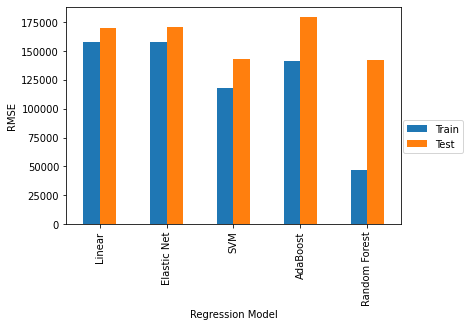

In [36]:
# SUMMARY 
reg_types = ['Linear', 'Elastic Net', 'SVM', 'AdaBoost', 'Random Forest']
types = ['Train', 'Test']
trains = [lin_train_rmse, train_en_rmse, train_rmse_svr, train_rmse_ada, train_rmse_rf]
tests = [lin_test_rmse, test_en_rmse, test_rmse_svr, test_rmse_ada, test_rmse_rf]

data = {types[0]: trains, types[1]: tests}
df = pd.DataFrame(data, columns=types, index=reg_types)

df.plot(kind='bar').legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel('Regression Model')
plt.ylabel('RMSE')
plt.show()

In conclusion, we can see that the Random Forest Regression had the best performance amongst our models even though overfitting occured. SVM had the second lowest errors for both Training and Testing RMSE and does not show signs of overfitting. Although there is a slight disparity between the Training and Testing RMSE values for AdaBoost, we can see slight amounts of overfitting but it is definitely not as intense as the Random Forest Regression. We also see that Elastic Net performed the worst on the Training set with Linear Regression as a second. 

# Next Steps

- There could be scope for some extensive hyperparameter tuning to potentially reduce some out of sample RMSEs.

- Physically examining collinearity and removing features could help feature selection (of numeric features), and thus result in a more efficient model.

- Dimensionality reduction algorithms, especially PCA could help, as it works well on sparse matrices. However, the feature set’s correlation to the label set is not considered by the PCA algorithm, and might result in either a less overfit model, or a model that does worse than before.

- Ensemble Methods such as voting regressors, or blenders are worth looking at as in most cases, they produce lower out of sample RMSE values.
